<a href="https://colab.research.google.com/github/RuthStowers/MAT422/blob/main/Homework_3_5_and_3_6_K_Means_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.5 and 3.6
*   K-Means
*   Support Vector Machine

#3.5 -  K-means

k-means clustering is a simple method of data organization in machine learning. The data is sorted by its mean into clusters of data points with similar attributes. k is the number of specified clusters.

A simple example is shown below.

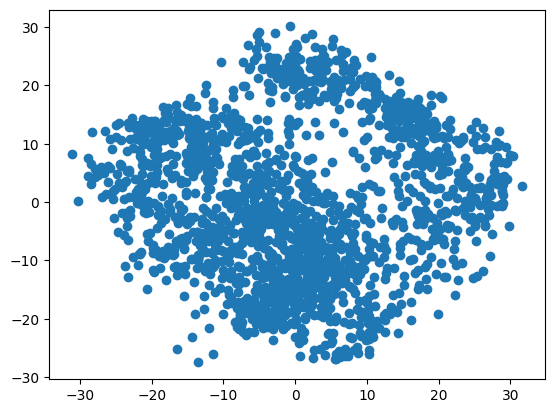

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

data = load_digits().data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

df.shape

plt.scatter(df[:,0], df[:,1],)

plt.show()

Above we see a scatter plot representing our data. Below we see our data grouped by k-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


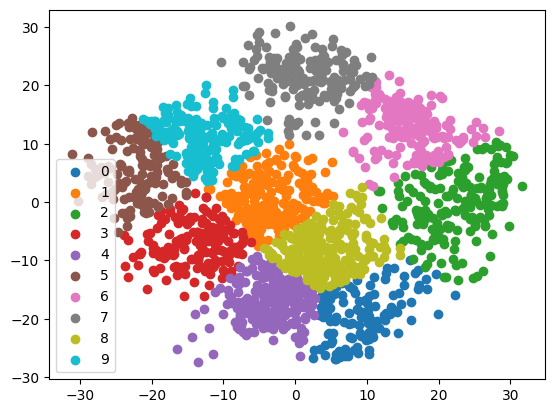

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10)

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

We can show just the cluster with label 0.

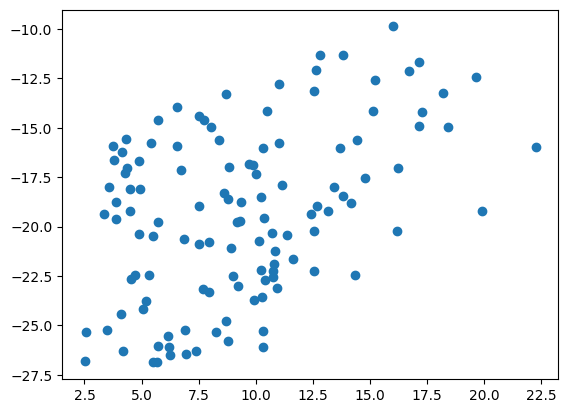

In [6]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

Or we can show multiple clusters at once. Here we see the clusters with labels 1 and 7.

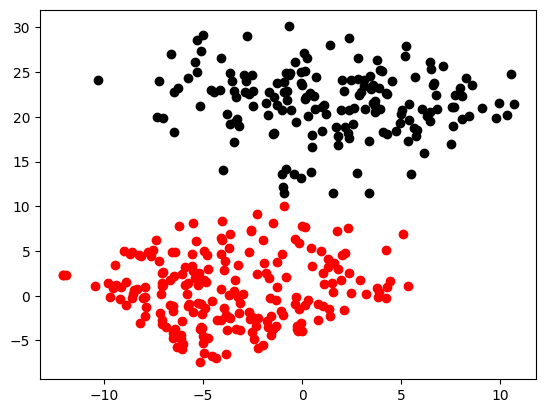

In [7]:
#filter rows of original data
filtered_label1 = df[label == 1]

filtered_label7 = df[label == 7]

#Plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label7[:,0] , filtered_label7[:,1] , color = 'black')
plt.show()

#3.6 Support Vector Machine

Support Vector Machines (SVMs) are supervised learning models in machine learning. They aim to analyze data for classification and regression analysis. They do this by constructing a hyperplane in iterative manner which is used to minimize error. The idea is to find a maximum marginal hyperplane that best divides the dataset into classes.

To show this process, here is an example.

Below is a plot of a dataset consisting of 40 points.

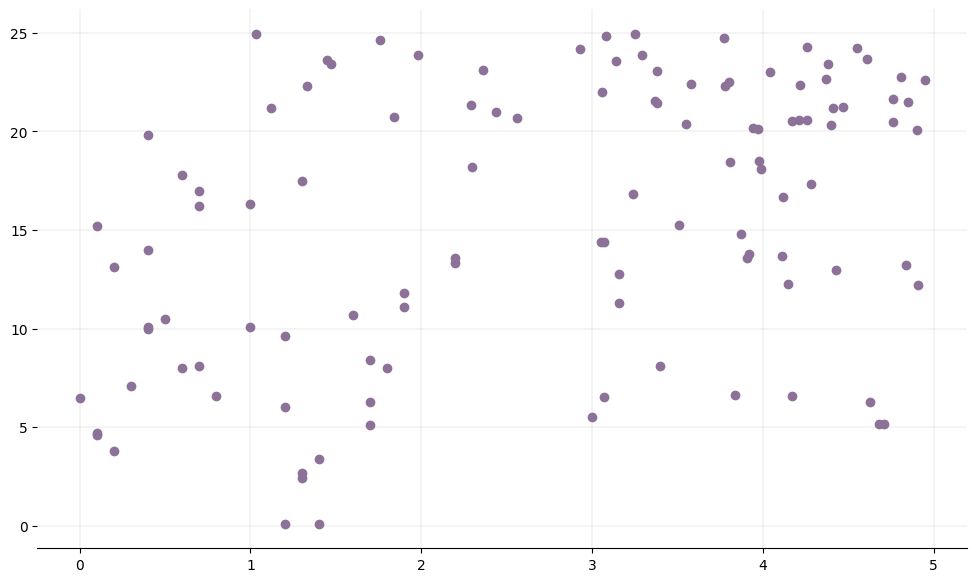

In [8]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

# Generate dataset
size = 40
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

Now let's apply an SVM.

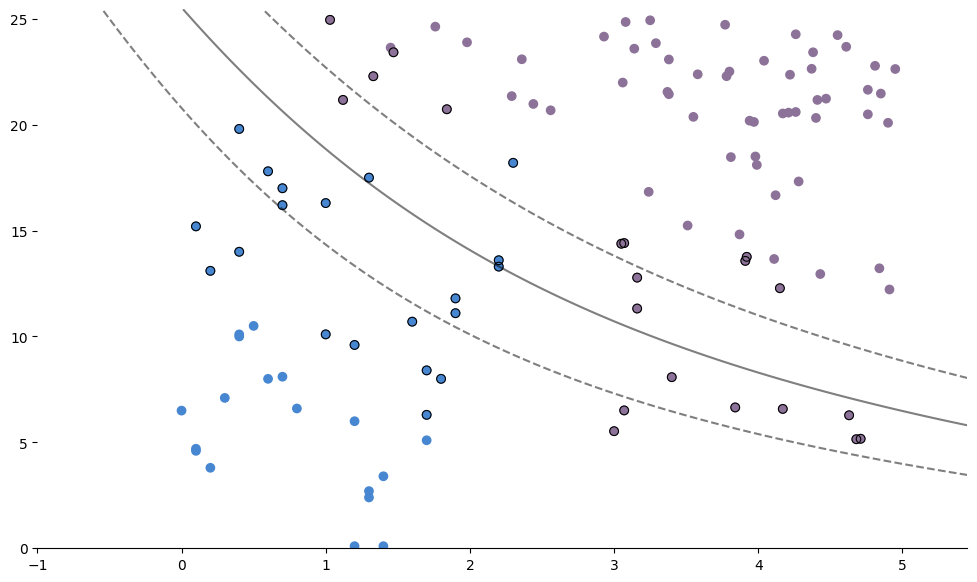

In [9]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(12, 7))
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 0.5, len(x_train))
yy = np.linspace(0, max(features['y']) + 0.5, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=40, linewidth=.8, facecolors='none', edgecolors='k')
plt.show()